20075


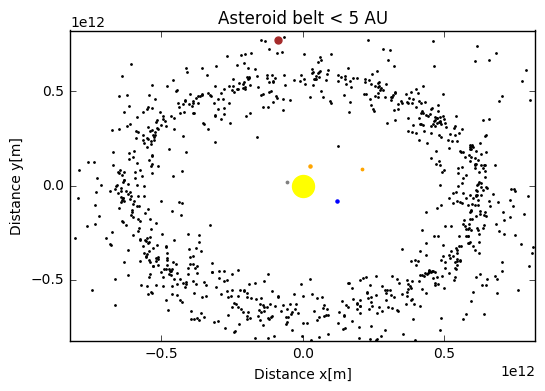

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display
import pylab as pl
import math
%matplotlib inline



G = 6.67*10**(-11) #SI units
m_sun = 2*10**30 #kg
m_jup = 1.898*10**27 #kg
AU = 1.496*10**11 #m
pos_jup = 5.2 * AU,0,0 #m
pos_sun = 0,0,0 #m
dt = 3600*24 #dag
N = 1000 #unitless
tijd = 365000 #2 #dag


inner_r = 4 #AU
outer_r = 4.5 #AU
r_max_kwad = 4.5**2 #AU^2
r_min_kwad = 16 #AU^2

x_sun, y_sun, z_sun = pos_sun
x_jup, y_jup, z_jup = pos_jup

def planet_start(pos_planet):
    x_planet = pos_planet[0]
    y_planet = pos_planet[1]
    z_planet = pos_planet[2]
    theta_planet = math.atan2(y_planet, z_planet)
    d_planet_to_sun = np.sqrt(x_planet**2 + y_planet**2)
    v_planet = np.sqrt(G * m_sun/d_planet_to_sun)
    vx_planet = v_planet * np.sin(theta_planet)
    vy_planet = - v_planet * np.cos(theta_planet)
    vz_planet = 0
    return x_planet, y_planet, z_planet, vx_planet, vy_planet, vz_planet



# They'll go clockwise!
def startvalue_generator(N):
    x_list = []
    y_list = []
    r_list = []
    prop_non_plot_list_start = []
    N_succeed = 0

    while N_succeed < N:
        x = random.uniform(-outer_r, outer_r)
        y = random.uniform(-outer_r, outer_r)
        if x**2 + y**2 <= r_max_kwad and x**2 + y**2 >= r_min_kwad:
            x = x * AU
            y = y * AU
            z = 0#random.uniform(-0.1, 0.1) #random units
            d = np.sqrt(x**2 + y**2)
            vscaler = random.uniform(0.9, 1.1) #small variation on kepler
            v = np.sqrt(G*m_sun/d) * vscaler
            theta = math.atan2(y,x)
            v_x = v * np.sin(theta)
            v_y = -v * np.cos(theta)
            #print theta, v_x, v_y
            #print v_x, 'v_x', v_y, 'v_y'
            #v_z = np.sqrt(G*m_sun*np.abs(z**(-1))) * vscaler #random units atm
            v_z = 0 #just testing
            props_non_plot = [z, v_x, v_y, v_z]
            x_list.append(x)
            y_list.append(y)
            r_list.append(np.sqrt(x**2+y**2))
            prop_non_plot_tuple = tuple(props_non_plot)
            prop_non_plot_list_start.append(prop_non_plot_tuple)
            N_succeed = N_succeed + 1
    return x_list,y_list, r_list, prop_non_plot_list_start
    
#################### 2D plot starts here ##########################
#N = 1000
#properties = startvalue_generator(N)
#x_list = []
#y_list = []
#z_list = []
#for i in range(N):
#    x = properties[i][0]
#    x_list.append(x*AU)
#    y = properties[i][1]
#    y_list.append(y*AU)
#    z = properties[i][3][0]
#    z_list.append(z*AU)

    

#print 'The number of astroids in this figure = %.5g' % N
#plt.scatter(x_list, y_list, 1, color='black', label='Asteroid')
#plt.scatter([5*AU], [0], 25, color='brown', label='Jupiter')
#plt.scatter([0], [0], 250, color='yellow', label='Sun')
#plt.title('Asteroid belt < 5 AU')
#plt.xlabel('Distance x[m]')
#plt.ylabel('Distance y[m]')
#plt.legend(loc=3, scatterpoints=1)
#plt.show()
#################### 2D plot ends here ##########################


def planet_pos(planet_x_last, planet_y_last, planet_z_last, v_x_planet, v_y_planet, v_z_planet):
    sun_constant = (-G * m_sun)/((np.sqrt((planet_x_last - x_sun)**2 + (planet_y_last - y_sun)**2 + (planet_z_last - z_sun)**2))**3)
    a_x = sun_constant * (planet_x_last - x_sun)
    a_y = sun_constant * (planet_y_last - y_sun)
    a_z = sun_constant * (planet_z_last - z_sun)
    planet_v_x_new = v_x_planet + a_x *dt
    planet_v_y_new = v_y_planet + a_y *dt
    planet_v_z_new = v_z_planet + a_z *dt
    planet_x_new = planet_x_last + planet_v_x_new * dt
    planet_y_new = planet_y_last + planet_v_y_new * dt
    planet_z_new = planet_z_last + planet_v_z_new * dt
    return planet_x_new, planet_y_new, planet_z_new, planet_v_x_new, planet_v_y_new, planet_v_z_new

def euler_cromer(x_last_plot,y_last_plot, pos_vel_non_plot):
    '''
    Input: 
    Output: 
    How: 
    '''
    x_last = x_last_plot
    y_last = y_last_plot
    z_last = pos_vel_non_plot[0]
    vx_last = pos_vel_non_plot[1]
    vy_last = pos_vel_non_plot[2]
    vz_last = pos_vel_non_plot[3]


    r_last = np.sqrt(x_last**2 + y_last**2 + z_last**2)
    sun_constant = (-G * m_sun)/((np.sqrt((x_last - x_sun)**2 + (y_last - y_sun)**2 + (z_last - z_sun)**2))**3)
    jup_constant = (-G * m_jup)/((np.sqrt((x_last - x_jup)**2 + (y_last - y_jup)**2 + (z_last - z_jup)**2))**3)
    
    a_x = sun_constant * (x_last - x_sun) + jup_constant * (x_last - x_jup)
    a_y = sun_constant * (y_last - y_sun) + jup_constant * (y_last - y_jup)
    a_z = sun_constant * (z_last - z_sun) + jup_constant * (z_last - z_jup)
    #a = sun_constant  + jup_constant
    #theta = math.atan2(y_last,x_last)
    vx_new = vx_last + a_x * dt#+ a * math.cos(theta) * dt
    vy_new = vy_last + a_y * dt#+ a * math.sin(theta) * dt
    #print vx_new, vy_new
    vz_new = 0#z_last + a_z * dt
    x_new = x_last + vx_new * dt
    y_new = y_last + vy_new * dt
    z_new = z_last# + vz_new * dt
#    print vx_new, 'v_x in m/s |||', vy_new, 'v_y in m/s |||', x_new, 'x in m |||', y_new, 'y in m |||'
    pos_vel_new_non_plot = tuple([z_new, vx_new, vy_new, vz_new])
    return x_new, y_new, pos_vel_new_non_plot


def asteroids(tijd):
    fig = plt.figure()
    x_list, y_list, r_list, pos_vel_non_plot = startvalue_generator(N)
    jup_x_last, jup_y_last, jup_z_last, v_x_jup, v_y_jup, v_z_jup = planet_start([5.2*AU,0,0])
    merc_x_last, merc_y_last, merc_z_last, v_x_merc, v_y_merc, v_z_merc = planet_start([.39*AU,0,0])
    ven_x_last, ven_y_last, ven_z_last, v_x_ven, v_y_ven, v_z_ven = planet_start([.72*AU,0,0])
    earth_x_last, earth_y_last, earth_z_last, v_x_earth, v_y_earth, v_z_earth = planet_start([1.0*AU,0,0])
    mars_x_last, mars_y_last, mars_z_last, v_x_mars, v_y_mars, v_z_mars = planet_start([1.52*AU,0,0])
    for t in range(tijd):    
        for deeltje in range(len(x_list)):
            x_last_plot = x_list[deeltje]
            y_last_plot = y_list[deeltje]
            r_last_plot = r_list[deeltje]
            pos_vel_last_non_plot = pos_vel_non_plot[deeltje]
            x_new, y_new, pos_vel_new_non_plot = euler_cromer(x_last_plot, y_last_plot, pos_vel_last_non_plot)
            x_list[deeltje] = x_new
            y_list[deeltje] = y_new
            r_list[deeltje] = np.sqrt(x_new**2+y_new**2)
            pos_vel_non_plot[deeltje] = pos_vel_new_non_plot
        jup_x_last, jup_y_last, jup_z_last, v_x_jup, v_y_jup, v_z_jup = planet_pos(jup_x_last, jup_y_last, jup_z_last, v_x_jup, v_y_jup, v_z_jup)
        merc_x_last, merc_y_last, merc_z_last, v_x_merc, v_y_merc, v_z_merc = planet_pos(merc_x_last, merc_y_last, merc_z_last, v_x_merc, v_y_merc, v_z_merc)
        ven_x_last, ven_y_last, ven_z_last, v_x_ven, v_y_ven, v_z_ven =  planet_pos(ven_x_last, ven_y_last, ven_z_last, v_x_ven, v_y_ven, v_z_ven)
        earth_x_last, earth_y_last, earth_z_last, v_x_earth, v_y_earth, v_z_earth =  planet_pos(earth_x_last, earth_y_last, earth_z_last, v_x_earth, v_y_earth, v_z_earth)
        mars_x_last, mars_y_last, mars_z_last, v_x_mars, v_y_mars, v_z_mars =  planet_pos(mars_x_last, mars_y_last, mars_z_last, v_x_mars, v_y_mars, v_z_mars)
        if t % 365 == 0:
            #while True:
                #try:
                
            fig.clear()
            plt.scatter(merc_x_last, merc_y_last, s = 3, color = 'grey')
            plt.scatter(ven_x_last, ven_y_last, s = 5, color = 'orange')
            plt.scatter(earth_x_last, earth_y_last, s = 5, color = 'blue')
            plt.scatter(mars_x_last, mars_y_last, s = 3, color = 'orange')
            plt.scatter(jup_x_last, jup_y_last, s = 25, color = 'brown')
            plt.scatter(pos_sun[0], pos_sun[1], s = 250, color = 'yellow')
            plt.scatter(x_list,y_list, s = 1, color = 'black')
            plt.title('Asteroid belt < 5 AU')
            plt.xlabel('Distance x[m]')
            plt.ylabel('Distance y[m]')
            plt.xlim([-5.5*AU,5.5*AU])
            plt.ylim([-5.5*AU,5.5*AU])
            display.display(pl.gcf())

            
            fig.clear()
            plt.hist(r_list, bins = 100)
            plt.title('Astroids per shell')
            plt.xlabel('Radius[m]')
            plt.ylabel('Counts per bin')
            plt.xlim([4*AU,4.5*AU])
            display.display(pl.gcf())
            
            display.clear_output(wait=True)
            
            time.sleep(0.4)
            print t
                #except KeyboardInterrupt:
                    #break
    return 'Done'

print asteroids(tijd)

#################### 3D plot starts here ##########################
#from mpl_toolkits.mplot3d import Axes3D

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

#ax.scatter(x_list, y_list, z_list, s=1, color='black', label='Asteroid')
#ax.scatter([5*AU], [0], [0], s=25, color='brown', label='Jupiter')
#ax.scatter([0], [0], [0], s=250, color='yellow', label='Sun')
#ticks = [-5*AU, 0, 5*AU]
#ax.set_xlabel('x[m]')
#ax.set_ylabel('y[m]')
#ax.set_zlabel('z[m]')
#ax.set_xbound(-5*AU, 5*AU)
#ax.set_ybound(-5*AU, 5*AU)
#ax.set_zbound(-5*AU, 5*AU)
#ax.set_xticks(ticks)
#ax.set_yticks(ticks)
#ax.set_zticks(ticks)

#plt.legend(loc=3, scatterpoints=1)
#plt.show()
#################### 3D plot ends here ##########################